# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory.
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [ ]:
# Install requirements
!python -m pip install -r requirements.txt

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`!

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [ ]:
# Define transforms
transforms = transforms.ToTensor()

# Create training set and define training dataloader
train_data = torchvision.datasets.MNIST(root="data", train=True, download=True, transform=transforms)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

# Create test set and define test dataloader
test_data = torchvision.datasets.MNIST(root="data", train=False, download=True, transform=transforms)
test_loader = DataLoader(test_data, batch_size=100)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

The preprocessing steps chosen for the MNIST dataset are necessary to prepare the data for use with a deep learning model. Here's a breakdown of the reasons behind each step:

1.Converting Images to Tensors:

-Why: The MNIST dataset contains images in the form of numpy arrays. However, PyTorch models expect input data in the form of tensors. The ToTensor() transform is used to convert these numpy arrays into PyTorch tensors, which is a necessary step for model training.

-Why not: If the model were designed to accept numpy arrays directly, then no conversion would be needed. However, most deep learning frameworks, including PyTorch, require tensors as input.


2.Loading and Batching Data:

-Why: The MNIST dataset is large, and processing it all at once can be memory-intensive. The DataLoader class is used to split the data into smaller batches, which can be processed more efficiently. This also allows for shuffling the data, which is important for training models that rely on randomness, such as stochastic gradient descent.

-Why not: If the model were designed to process the entire dataset at once, then no batching would be needed. However, most deep learning models are designed to process batches of data, and the DataLoader class makes this process more efficient.


Q.Why Not Use Additional Preprocessing Steps?

While additional preprocessing steps, such as normalization or data augmentation, can be beneficial for some datasets, they are not necessary for the MNIST dataset. Here's why:

-Normalization: The MNIST dataset is already normalized to have pixel values between 0 and 255. Normalization is typically used to scale the data to a common range, which can help with model convergence. However, since the MNIST dataset is already normalized, this step is not necessary.

-Data Augmentation: Data augmentation is a technique used to artificially increase the size of a dataset by applying random transformations to the images. This can help the model generalize better to new, unseen data. However, the MNIST dataset is already a large dataset, and data augmentation may not provide significant benefits in this case.

In summary, the chosen preprocessing steps are necessary to prepare the MNIST dataset for use with a deep learning model. The ToTensor() transform is used to convert the images to tensors, and the DataLoader class is used to load and batch the data. Additional preprocessing steps, such as normalization or data augmentation, are not necessary for this dataset.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [5]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)

    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))

        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

In [7]:
# Explore data
## YOUR CODE HERE ##
print("Number of MNIST train data examples: {}".format(len(train_data)))
print("Number of MNIST test data examples: {}".format(len(test_data)))

Number of MNIST train data examples: 60000
Number of MNIST test data examples: 10000


In [8]:
## YOUR CODE HERE ##
dataiter = iter(train_loader)
images, labels = next(dataiter)

print("number of images: {}".format(images.shape))
print("number of labels: {}".format(labels.shape))

number of images: torch.Size([100, 1, 28, 28])
number of labels: torch.Size([100])


## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like.

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [9]:
## YOUR CODE HERE ##
class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        self.activation = F.relu
        self.layer1 = nn.Linear(28 * 28, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.layer3(x)
        return x

net1 = Net1()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch.
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [10]:
## YOUR CODE HERE ##
# Choose an optimizer
optimizer = optim.Adam(net1.parameters(), lr=0.001)

# Choose a loss function
criterion = nn.CrossEntropyLoss()

In [11]:
num_epochs = 10

# Establish a list for our history
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    net1.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Zero out the gradients of the optimizer
        optimizer.zero_grad()

        # Get the outputs of your model and compute your loss
        outputs = net1(inputs)
        loss = criterion(outputs, labels)

        # Compute the loss gradient using the backward method and have the optimizer take a step
        loss.backward()
        optimizer.step()

        # Compute the accuracy and print the accuracy and loss
        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))

    # The validation step is done for you.
    val_loss = 0.0
    val_correct = 0
    net1.eval()
    for inputs, labels in test_loader:

        outputs = net1(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).sum().item()
        val_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(test_loader):.2f}% validation loss: {val_loss/len(test_loader):.5f}')
    val_loss_history.append(val_loss/len(test_loader))

Epoch 1 training accuracy: 89.76% training loss: 0.38249
Epoch 1 validation accuracy: 94.16% validation loss: 0.20018
Epoch 2 training accuracy: 95.35% training loss: 0.15827
Epoch 2 validation accuracy: 95.93% validation loss: 0.13550
Epoch 3 training accuracy: 96.73% training loss: 0.11054
Epoch 3 validation accuracy: 96.73% validation loss: 0.10826
Epoch 4 training accuracy: 97.38% training loss: 0.08355
Epoch 4 validation accuracy: 97.11% validation loss: 0.09439
Epoch 5 training accuracy: 97.96% training loss: 0.06620
Epoch 5 validation accuracy: 97.51% validation loss: 0.08344
Epoch 6 training accuracy: 98.39% training loss: 0.05266
Epoch 6 validation accuracy: 97.43% validation loss: 0.08506
Epoch 7 training accuracy: 98.67% training loss: 0.04329
Epoch 7 validation accuracy: 97.54% validation loss: 0.07897
Epoch 8 training accuracy: 98.87% training loss: 0.03653
Epoch 8 validation accuracy: 97.58% validation loss: 0.08011
Epoch 9 training accuracy: 99.12% training loss: 0.02889

Plot the training loss (and validation loss/accuracy, if recorded).

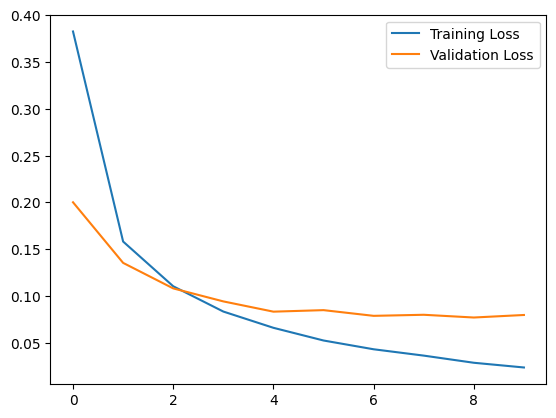

In [12]:
## YOUR CODE HERE ##
# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction.

If your accuracy is over 90%, great work, but see if you can push a bit further!
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [13]:
## YOUR CODE HERE ##
def test1():
    net1.eval()
    test_loss = 0
    test_correct = 0
    for i, data in enumerate(test_loader):
        inputs, labels  = data

        optimizer.zero_grad()

        outputs = net1(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        test_correct += (preds == labels).sum().item()
        test_loss += loss.item()
    print(f'Epoch {epoch + 1} test accuracy: {test_correct/len(test_loader):.2f}% test loss: {test_loss/len(test_loader):.5f}')

In [14]:
for epoch in range(num_epochs):
    test1()

Epoch 1 test accuracy: 96.84% test loss: 0.10123
Epoch 2 test accuracy: 98.50% test loss: 0.04624
Epoch 3 test accuracy: 99.52% test loss: 0.02000
Epoch 4 test accuracy: 99.87% test loss: 0.01025
Epoch 5 test accuracy: 99.96% test loss: 0.00605
Epoch 6 test accuracy: 99.99% test loss: 0.00423
Epoch 7 test accuracy: 99.99% test loss: 0.00318
Epoch 8 test accuracy: 100.00% test loss: 0.00252
Epoch 9 test accuracy: 100.00% test loss: 0.00206
Epoch 10 test accuracy: 100.00% test loss: 0.00174


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [15]:
## YOUR CODE HERE ##
# Add dropout = 0.2

class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.activation = F.relu
        self.layer1 = nn.Linear(28 * 28, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 10)

        self.dropout=nn.Dropout(0.2)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.layer3(x)
        return x

net2 = Net2()

In [16]:
# Choose an optimizer
optimizer = optim.Adam(net2.parameters(), lr=0.001)

# Choose a loss function
criterion = nn.CrossEntropyLoss()

In [17]:
num_epochs = 10

# Establish a list for our history
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    net2.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Zero out the gradients of the optimizer
        optimizer.zero_grad()

        # Get the outputs of your model and compute your loss
        outputs = net2(inputs)
        loss = criterion(outputs, labels)

        # Compute the loss gradient using the backward method and have the optimizer take a step
        loss.backward()
        optimizer.step()

        # Compute the accuracy and print the accuracy and loss
        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))

    # The validation step is done for you.
    val_loss = 0.0
    val_correct = 0
    net1.eval()
    for inputs, labels in test_loader:

        outputs = net1(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).sum().item()
        val_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(test_loader):.2f}% validation loss: {val_loss/len(test_loader):.5f}')
    val_loss_history.append(val_loss/len(test_loader))

Epoch 1 training accuracy: 89.79% training loss: 0.37583
Epoch 1 validation accuracy: 100.00% validation loss: 0.00169
Epoch 2 training accuracy: 95.53% training loss: 0.15363
Epoch 2 validation accuracy: 100.00% validation loss: 0.00169
Epoch 3 training accuracy: 96.81% training loss: 0.10946
Epoch 3 validation accuracy: 100.00% validation loss: 0.00169
Epoch 4 training accuracy: 97.44% training loss: 0.08389
Epoch 4 validation accuracy: 100.00% validation loss: 0.00169
Epoch 5 training accuracy: 97.94% training loss: 0.06620
Epoch 5 validation accuracy: 100.00% validation loss: 0.00169
Epoch 6 training accuracy: 98.30% training loss: 0.05401
Epoch 6 validation accuracy: 100.00% validation loss: 0.00169
Epoch 7 training accuracy: 98.70% training loss: 0.04225
Epoch 7 validation accuracy: 100.00% validation loss: 0.00169
Epoch 8 training accuracy: 98.87% training loss: 0.03521
Epoch 8 validation accuracy: 100.00% validation loss: 0.00169
Epoch 9 training accuracy: 99.09% training loss:

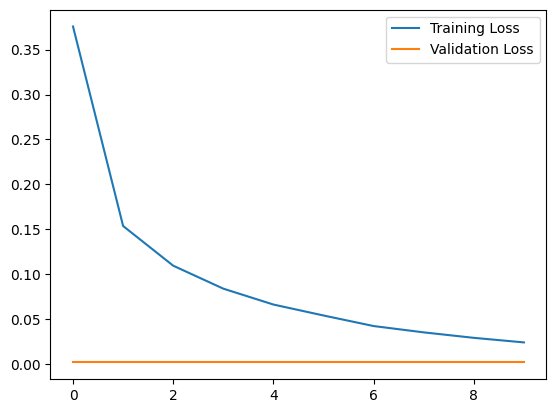

In [18]:
# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

In [19]:
def test2():
    net2.eval()
    test_loss = 0
    test_correct = 0
    for i, data in enumerate(test_loader):
        inputs, labels  = data

        optimizer.zero_grad()

        outputs = net1(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        test_correct += (preds == labels).sum().item()
        test_loss += loss.item()
    print(f'Epoch {epoch + 1} test accuracy: {test_correct/len(test_loader):.2f}% test loss: {test_loss/len(test_loader):.5f}')

In [20]:
for epoch in range(num_epochs):
    test2()

Epoch 1 test accuracy: 100.00% test loss: 0.00169
Epoch 2 test accuracy: 100.00% test loss: 0.00169
Epoch 3 test accuracy: 100.00% test loss: 0.00169
Epoch 4 test accuracy: 100.00% test loss: 0.00169
Epoch 5 test accuracy: 100.00% test loss: 0.00169
Epoch 6 test accuracy: 100.00% test loss: 0.00169
Epoch 7 test accuracy: 100.00% test loss: 0.00169
Epoch 8 test accuracy: 100.00% test loss: 0.00169
Epoch 9 test accuracy: 100.00% test loss: 0.00169
Epoch 10 test accuracy: 100.00% test loss: 0.00169


## Saving your model
Using `torch.save`, save your model for future loading.

In [21]:
## YOUR CODE HERE ##
torch.save(Net1, "Net1.pth")
torch.save(Net2, "Net2.pth")